<a href="https://colab.research.google.com/github/usman-codez/About_me-Quiz/blob/main/Online_payment_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing some essential libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

#Loading and inspecting data
data = pd.read_csv('dataset.csv')
data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,221,TRANSFER,8005.53,C2526694688,133171.23,-2655.58,C6304598913,120817.63,37869.21,0.0,0.0
1,183,CASH_OUT,36298.83,C1493536820,27879.36,2027.19,C6937802690,125422.55,105094.52,1.0,0.0
2,285,DEBIT,61320.16,C3702492595,109075.40,89004.78,C2972952229,95742.58,-1895.39,0.0,0.0
3,326,PAYMENT,4888.92,C5642067493,143778.62,99921.56,C7195481683,146311.33,75251.80,0.0,0.0
4,239,TRANSFER,160027.53,C2165528803,23749.03,-136278.50,C1211732803,101259.76,150244.26,1.0,0.0


In [ ]:
#check for any missing values(NANs)
data.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,1
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [ ]:
#To remove any row with missing values
data.dropna(inplace=True)  #inplace=True: make change into data directly
data.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
# Features and target variable
x = data[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']]
y = data['isFraud']

In [ ]:
type=data['type'].value_counts()
transactions=type.index
quantity=type.values

figure=px.pie(data,
             values=quantity,
             names=transactions,
             title='Distribution of Transaction Type')
figure.show()

<Axes: xlabel='type', ylabel='amount'>

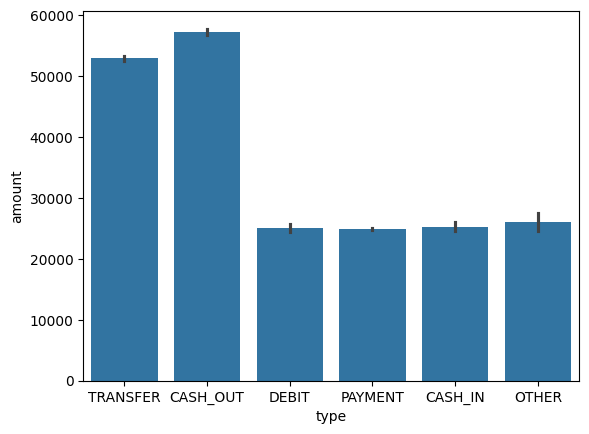

In [ ]:
sns.barplot(x='type', y='amount', data=data)

In [ ]:
# Convert categorical features to numerical
x = pd.get_dummies(x)

In [ ]:
#Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train = x_train.dropna()
y_train = y_train[x_train.index]

# Initialize the model
model = RandomForestClassifier()
# Train the model
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
from imblearn.over_sampling import SMOTE

model = RandomForestClassifier()
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Train the model on the resampled data
model.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier()

In [ ]:
# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 87.68%


In [ ]:

from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(x_test)

# Print detailed classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92     26322
         1.0       0.65      0.69      0.67      5866

    accuracy                           0.88     32188
   macro avg       0.79      0.80      0.80     32188
weighted avg       0.88      0.88      0.88     32188

[[24183  2139]
 [ 1826  4040]]


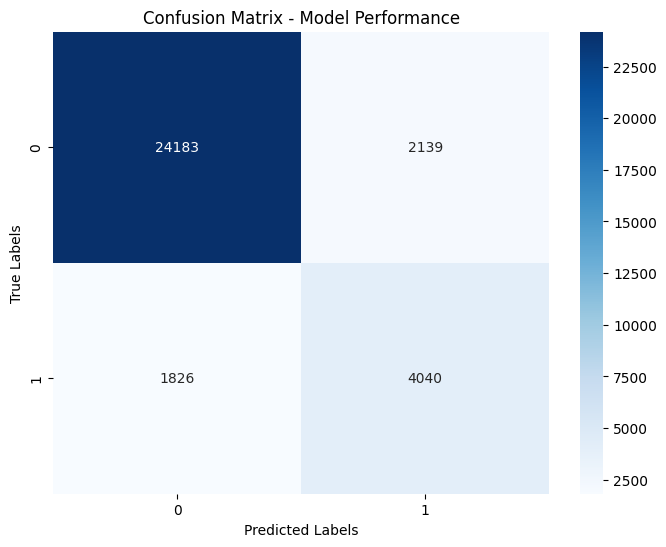

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Model Performance')

# Show the plot
plt.show()

In [ ]:
def predict_fraud(transaction):
    transaction_df = pd.DataFrame([transaction])
    transaction_df = pd.get_dummies(transaction_df)
    transaction_df = transaction_df.reindex(columns=x.columns, fill_value=0)
    prediction = model.predict(transaction_df)

    return 'Fraud' if prediction[0] == 1 else 'Not Fraud'

# Example transaction
new_transaction = {
    'type': 'TRANSFER',
    'amount': 321600.53,
    'oldbalanceOrg': -10,
    'newbalanceOrig': -136278.50
}
result = predict_fraud(new_transaction)
print(f'The transaction is: {result}')


The transaction is: Fraud
